# Commodities Seasonality Analysis

This notebook provides a comprehensive analysis of seasonal patterns in commodity futures markets.
We analyze 15 different commodities across Energy, Metals, and Agriculture sectors using 15+ years of daily data (2010-2025).

## Analysis Overview
- **Data Period**: January 2010 - August 2025
- **Commodities**: 15 futures contracts
- **Sectors**: Energy, Metals, Agriculture
- **Frequency**: Daily returns analysis
- **Statistical Testing**: Significance testing for seasonal patterns

In [13]:
import sys
import os
sys.path.append('../modules')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from seasonality_engine import CommoditySeasonalityAnalyzer
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

print("Libraries imported successfully!")

Libraries imported successfully!


## 1. Data Loading and Overview

In [14]:
# Initialize the seasonality analyzer
analyzer = CommoditySeasonalityAnalyzer()

# Load all commodity data
print("Loading commodity data...")
all_data = analyzer.load_commodity_data()

print(f"\nLoaded {len(all_data)} commodities:")
for symbol in all_data.keys():
    sector = analyzer.sector_mapping.get(symbol, 'Unknown')
    data_shape = all_data[symbol].shape
    print(f"  {symbol}: {sector} sector - {data_shape[0]} observations")

Loading commodity data...

Loaded 15 commodities:
  ZW_F: Agriculture sector - 3923 observations
  CC_F: Agriculture sector - 3923 observations
  RB_F: Energy sector - 3924 observations
  HG_F: Metals sector - 3924 observations
  ZC_F: Agriculture sector - 3921 observations
  NG_F: Energy sector - 3925 observations
  SB_F: Agriculture sector - 3924 observations
  SI_F: Metals sector - 3923 observations
  CT_F: Agriculture sector - 3924 observations
  ZS_F: Agriculture sector - 3923 observations
  CL_F: Energy sector - 3924 observations
  HO_F: Energy sector - 3924 observations
  GC_F: Metals sector - 3923 observations
  PA_F: Metals sector - 3905 observations
  BZ_F: Energy sector - 3893 observations


In [15]:
# Extract returns data for analysis
returns_data = analyzer.extract_returns_data(use_adjusted=True)

print(f"Returns data shape: {returns_data.shape}")
print(f"Date range: {returns_data.index.min()} to {returns_data.index.max()}")
print(f"Total trading days: {len(returns_data)}")

# Display basic statistics
print("\nBasic Return Statistics (annualized):")
summary_stats = returns_data.describe()
summary_stats.loc['mean'] *= 252  # Annualize mean
summary_stats.loc['std'] *= np.sqrt(252)  # Annualize volatility

display(summary_stats.round(4))

Returns data shape: (3867, 15)
Date range: 2010-01-05 00:00:00 to 2025-08-08 00:00:00
Total trading days: 3867

Basic Return Statistics (annualized):


,ZW_F,CC_F,RB_F,HG_F,ZC_F,NG_F,SB_F,SI_F,CT_F,ZS_F,CL_F,HO_F,GC_F,PA_F,BZ_F
count,3867.0000,3867.0000,3867.0000,3867.0000,3867.0000,3867.0000,3867.0000,3867.0000,3867.0000,3867.0000,3867.0000,3867.0000,3867.0000,3867.0000,3867.0000
mean,0.0233,0.1222,0.0833,0.0432,0.0235,0.0903,0.0136,0.0973,0.0334,0.0299,-0.1801,0.0610,0.0869,0.1293,0.0535
std,0.3177,0.3359,0.4071,0.2369,0.2744,0.5770,0.3088,0.3046,0.2804,0.2140,0.9396,0.3441,0.1606,0.3568,0.3561
min,-0.1068,-0.2294,-0.3198,-0.2225,-0.2356,-0.2595,-0.1163,-0.1775,-0.2388,-0.1050,-3.0597,-0.2193,-0.0935,-0.2086,-0.2440
25%,-0.0120,-0.0104,-0.0114,-0.0077,-0.0092,-0.0193,-0.0111,-0.0087,-0.0087,-0.0074,-0.0117,-0.0102,-0.0045,-0.0116,-0.0099
50%,-0.0006,0.0005,0.0010,0.0002,0.0000,-0.0004,-0.0006,0.0005,0.0000,0.0005,0.0008,0.0008,0.0004,0.0012,0.0006
75%,0.0113,0.0112,0.0131,0.0085,0.0093,0.0185,0.0111,0.0097,0.0092,0.0077,0.0124,0.0113,0.0058,0.0126,0.0110
max,0.2178,0.1366,0.2510,0.1325,0.0900,0.4648,0.1142,0.0929,0.0721,0.0664,0.3766,0.1315,0.0595,0.2535,0.2102


## 2. Monthly Seasonality Analysis

In [16]:
# Calculate comprehensive seasonal analysis
seasonal_results = analyzer.get_seasonal_summary_stats(returns_data)

monthly_returns = seasonal_results['monthly_returns']
significance = seasonal_results['statistical_significance']

print("Monthly Seasonality Patterns (Average Monthly Returns):")
display(monthly_returns.round(4))

Monthly Seasonality Patterns (Average Monthly Returns):


,ZW_F,CC_F,RB_F,HG_F,ZC_F,NG_F,SB_F,SI_F,CT_F,ZS_F,CL_F,HO_F,GC_F,PA_F,BZ_F
Jan,-0.0007,0.0005,0.0004,0.0002,0.0006,-0.0027,0.0007,0.0015,0.0015,0.0003,0.0005,0.0006,0.0013,0.0013,0.0008
Feb,-0.0005,0.0022,0.0023,0.0010,0.0003,-0.0015,0.0001,0.0001,0.0013,0.0008,0.0011,0.0010,0.0002,0.0007,0.0019
Mar,0.0006,0.0000,0.0035,0.0001,0.0003,0.0003,-0.0035,0.0007,0.0001,0.0004,-0.0007,-0.0009,0.0007,0.0007,-0.0014
Apr,0.0005,0.0028,0.0019,-0.0000,0.0016,0.0036,-0.0009,0.0007,0.0007,0.0009,-0.0094,0.0009,0.0009,0.0010,0.0021
May,0.0003,-0.0009,0.0004,-0.0008,-0.0009,0.0011,-0.0007,-0.0003,-0.0020,-0.0007,0.0006,-0.0008,-0.0003,-0.0017,-0.0003
Jun,-0.0009,-0.0003,0.0005,-0.0001,-0.0007,0.0011,0.0017,-0.0002,-0.0009,0.0009,0.0014,0.0017,-0.0000,0.0000,0.0010
Jul,0.0008,0.0001,0.0004,0.0002,-0.0031,-0.0005,0.0002,0.0013,-0.0015,-0.0011,-0.0004,0.0003,0.0005,0.0020,0.0001
Aug,-0.0013,0.0013,-0.0014,-0.0004,-0.0003,0.0017,-0.0003,0.0011,0.0009,-0.0015,-0.0006,0.0008,0.0012,0.0001,0.0000
Sep,0.0013,-0.0012,-0.0027,-0.0002,0.0008,0.0020,0.0025,-0.0018,-0.0007,-0.0009,-0.0000,0.0002,-0.0009,0.0002,-0.0004
Oct,0.0005,-0.0002,-0.0010,0.0005,0.0015,0.0023,0.0025,0.0012,0.0001,0.0008,-0.0004,0.0004,0.0005,0.0000,-0.0001


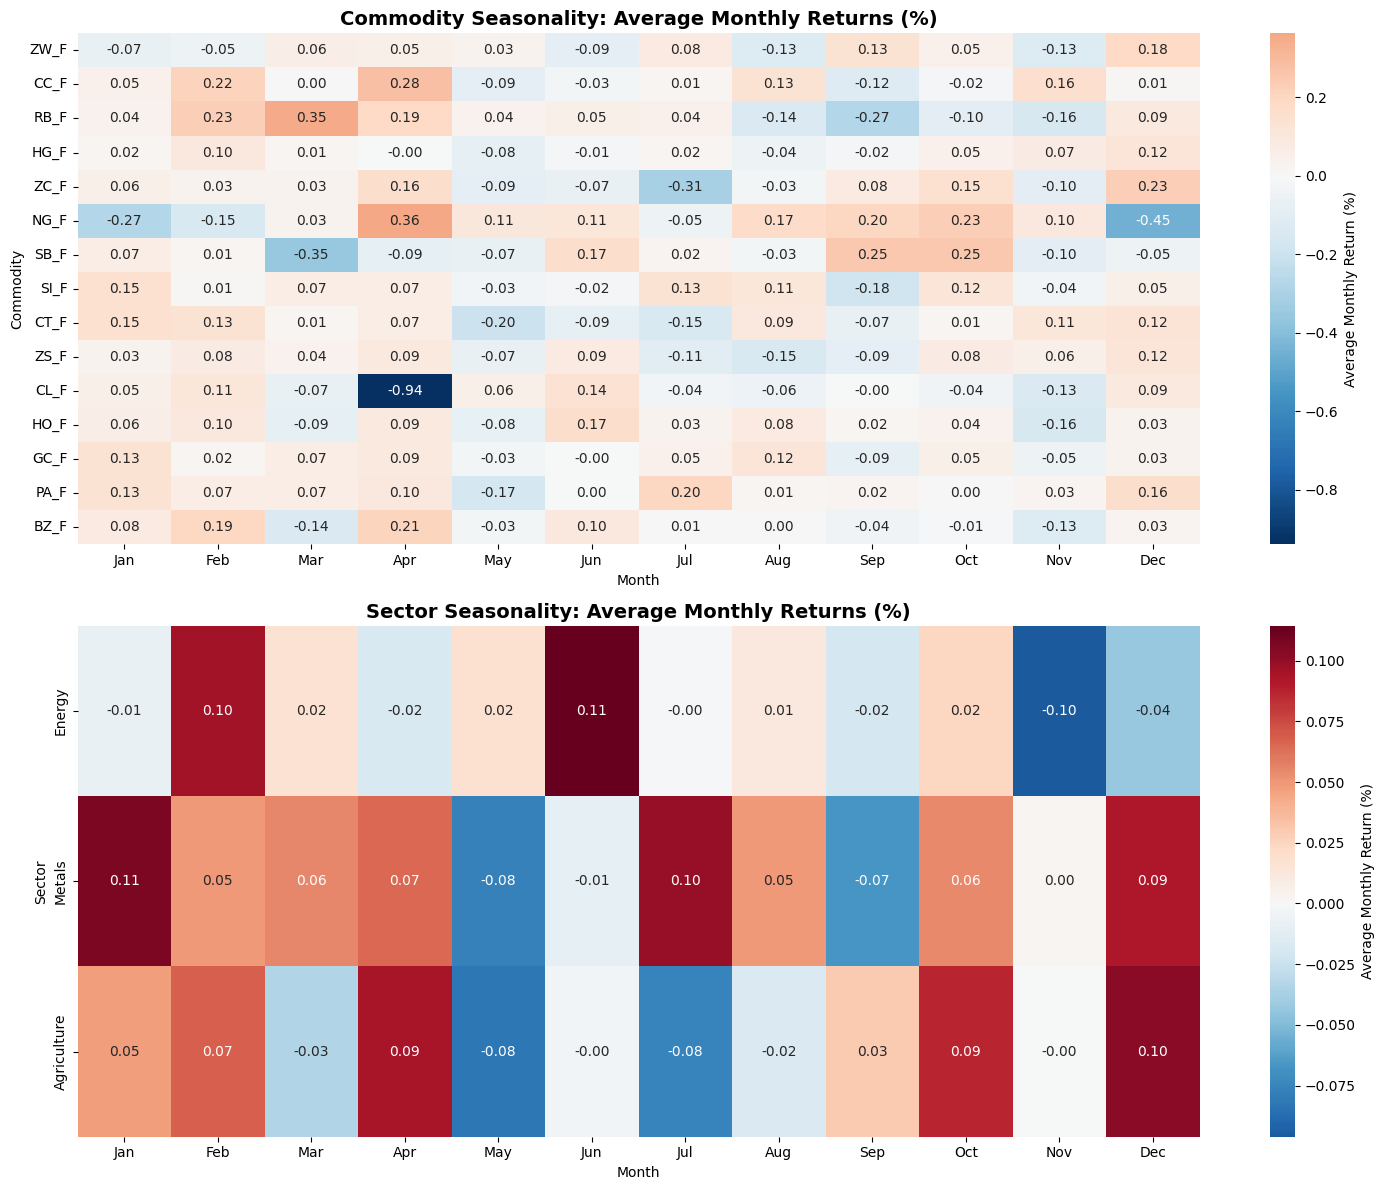

In [17]:
# Create comprehensive monthly seasonality heatmap
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 12))

# Plot 1: Monthly returns heatmap
sns.heatmap(monthly_returns.T * 100, 
            annot=True, 
            fmt='.2f', 
            cmap='RdBu_r', 
            center=0,
            ax=ax1,
            cbar_kws={'label': 'Average Monthly Return (%)'})
ax1.set_title('Commodity Seasonality: Average Monthly Returns (%)', fontsize=14, fontweight='bold')
ax1.set_xlabel('Month')
ax1.set_ylabel('Commodity')

# Plot 2: Sector-based seasonality
sector_seasonality = seasonal_results['sector_seasonality']
sns.heatmap(sector_seasonality.T * 100,
            annot=True,
            fmt='.2f',
            cmap='RdBu_r',
            center=0,
            ax=ax2,
            cbar_kws={'label': 'Average Monthly Return (%)'})
ax2.set_title('Sector Seasonality: Average Monthly Returns (%)', fontsize=14, fontweight='bold')
ax2.set_xlabel('Month')
ax2.set_ylabel('Sector')

plt.tight_layout()
plt.savefig('../results/monthly_seasonality_heatmaps.png', dpi=300, bbox_inches='tight')
plt.show()

## 3. Statistical Significance Analysis

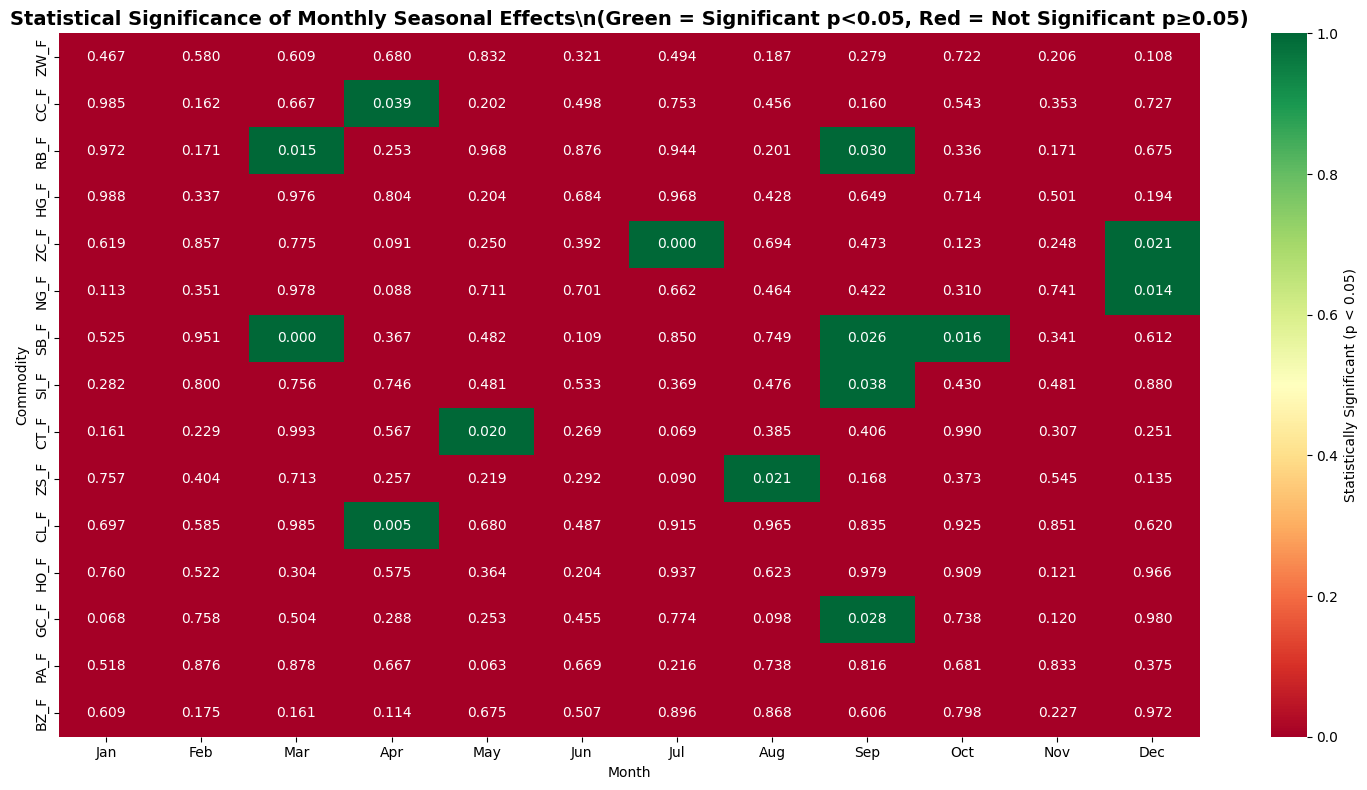

\nStatistical Significance Summary:
Total tests performed: 180
Statistically significant patterns: 14
Percentage of significant patterns: 7.8%


In [18]:
# Extract p-values for visualization
p_value_columns = [col for col in significance.columns if '_pvalue' in col]
p_values = significance[p_value_columns]
p_values.columns = [col.replace('_pvalue', '') for col in p_values.columns]

# Create significance heatmap
fig, ax = plt.subplots(figsize=(15, 8))

# Create custom colormap for p-values (green = significant, red = not significant)
significance_mask = p_values < 0.05
sns.heatmap(significance_mask.T, 
            annot=p_values.T.round(3), 
            fmt='.3f',
            cmap='RdYlGn',  # Fixed: green for True (significant), red for False (not significant)
            cbar_kws={'label': 'Statistically Significant (p < 0.05)'},
            ax=ax)

ax.set_title('Statistical Significance of Monthly Seasonal Effects\\n(Green = Significant p<0.05, Red = Not Significant p≥0.05)', 
             fontsize=14, fontweight='bold')
ax.set_xlabel('Month')
ax.set_ylabel('Commodity')

plt.tight_layout()
plt.savefig('../results/seasonal_significance.png', dpi=300, bbox_inches='tight')
plt.show()

# Summary of significant patterns
significant_count = significance_mask.sum().sum()
total_tests = significance_mask.shape[0] * significance_mask.shape[1]
print(f"\\nStatistical Significance Summary:")
print(f"Total tests performed: {total_tests}")
print(f"Statistically significant patterns: {significant_count}")
print(f"Percentage of significant patterns: {significant_count/total_tests*100:.1f}%")

## 4. Best and Worst Seasonal Periods

In [19]:
# Analyze best and worst months for each commodity
best_months = seasonal_results['best_months']
worst_months = seasonal_results['worst_months']
seasonal_strength = seasonal_results['seasonal_strength']

# Create summary DataFrame
seasonal_summary = pd.DataFrame({
    'Best_Month': best_months,
    'Best_Return_Pct': [monthly_returns.loc[best_months[commodity], commodity] * 100 
                        for commodity in best_months.index],
    'Worst_Month': worst_months,
    'Worst_Return_Pct': [monthly_returns.loc[worst_months[commodity], commodity] * 100 
                         for commodity in worst_months.index],
    'Seasonal_Strength_Pct': seasonal_strength * 100,
    'Sector': [analyzer.sector_mapping.get(commodity, 'Unknown') for commodity in best_months.index]
})

print("Best and Worst Seasonal Periods by Commodity:")
display(seasonal_summary.round(2))

Best and Worst Seasonal Periods by Commodity:


,Best_Month,Best_Return_Pct,Worst_Month,Worst_Return_Pct,Seasonal_Strength_Pct,Sector
ZW_F,Dec,0.18,Nov,-0.13,0.31,Agriculture
CC_F,Apr,0.28,Sep,-0.12,0.39,Agriculture
RB_F,Mar,0.35,Sep,-0.27,0.63,Energy
HG_F,Dec,0.12,May,-0.08,0.20,Metals
ZC_F,Dec,0.23,Jul,-0.31,0.54,Agriculture
NG_F,Apr,0.36,Dec,-0.45,0.81,Energy
SB_F,Oct,0.25,Mar,-0.35,0.61,Agriculture
SI_F,Jan,0.15,Sep,-0.18,0.33,Metals
CT_F,Jan,0.15,May,-0.20,0.35,Agriculture
ZS_F,Dec,0.12,Aug,-0.15,0.27,Agriculture


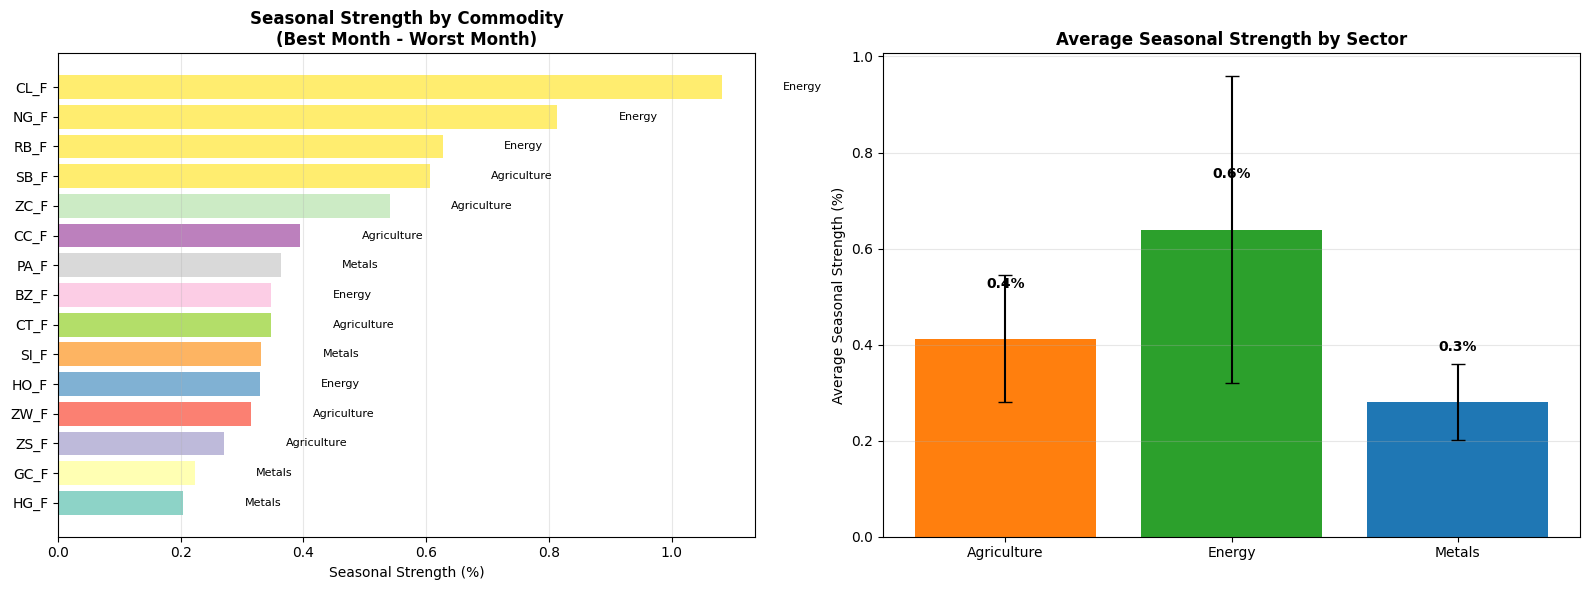

In [20]:
# Visualize seasonal strength by sector
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Seasonal strength by commodity
seasonal_strength_sorted = seasonal_strength.sort_values(ascending=True)
colors = [plt.cm.Set3(i) for i in range(len(seasonal_strength_sorted))]

bars = ax1.barh(range(len(seasonal_strength_sorted)), 
                seasonal_strength_sorted * 100, 
                color=colors)
ax1.set_yticks(range(len(seasonal_strength_sorted)))
ax1.set_yticklabels(seasonal_strength_sorted.index)
ax1.set_xlabel('Seasonal Strength (%)')
ax1.set_title('Seasonal Strength by Commodity\n(Best Month - Worst Month)', fontweight='bold')
ax1.grid(axis='x', alpha=0.3)

# Add sector color coding
for i, (commodity, strength) in enumerate(seasonal_strength_sorted.items()):
    sector = analyzer.sector_mapping.get(commodity, 'Unknown')
    ax1.text(strength * 100 + 0.1, i, sector, va='center', fontsize=8)

# Plot 2: Average seasonal strength by sector
sector_strength = seasonal_summary.groupby('Sector')['Seasonal_Strength_Pct'].agg(['mean', 'std'])

bars = ax2.bar(sector_strength.index, sector_strength['mean'], 
               yerr=sector_strength['std'], capsize=5,
               color=['#ff7f0e', '#2ca02c', '#1f77b4'])  # Orange, Green, Blue
ax2.set_ylabel('Average Seasonal Strength (%)')
ax2.set_title('Average Seasonal Strength by Sector', fontweight='bold')
ax2.grid(axis='y', alpha=0.3)

# Add values on top of bars
for bar, value in zip(bars, sector_strength['mean']):
    ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1, 
             f'{value:.1f}%', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.savefig('../results/seasonal_strength_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

## 5. Day-of-Week Effects Analysis

Day-of-Week Effects (Average Daily Returns):


,ZW_F,CC_F,RB_F,HG_F,ZC_F,NG_F,SB_F,SI_F,CT_F,ZS_F,CL_F,HO_F,GC_F,PA_F,BZ_F
DayOfWeek,,,,,,,,,,,,,,,
Monday,-0.002,0.029,-0.297,-0.002,-0.002,0.088,-0.082,0.126,0.038,-0.032,-0.539,-0.182,0.045,0.021,-0.171
Tuesday,-0.049,0.156,0.042,-0.001,-0.030,0.101,0.043,0.064,0.064,0.045,-0.112,0.105,0.047,0.049,-0.026
Wednesday,-0.019,0.079,0.141,-0.006,0.026,0.154,0.015,-0.004,0.049,0.032,0.108,0.112,-0.015,0.060,0.072
Thursday,0.022,-0.045,0.100,-0.023,-0.030,-0.141,-0.011,0.023,-0.059,-0.021,0.082,0.070,0.047,0.083,0.108
Friday,0.095,0.020,0.149,0.117,0.082,-0.021,0.054,-0.009,-0.024,0.032,0.063,-0.004,0.050,0.042,0.107


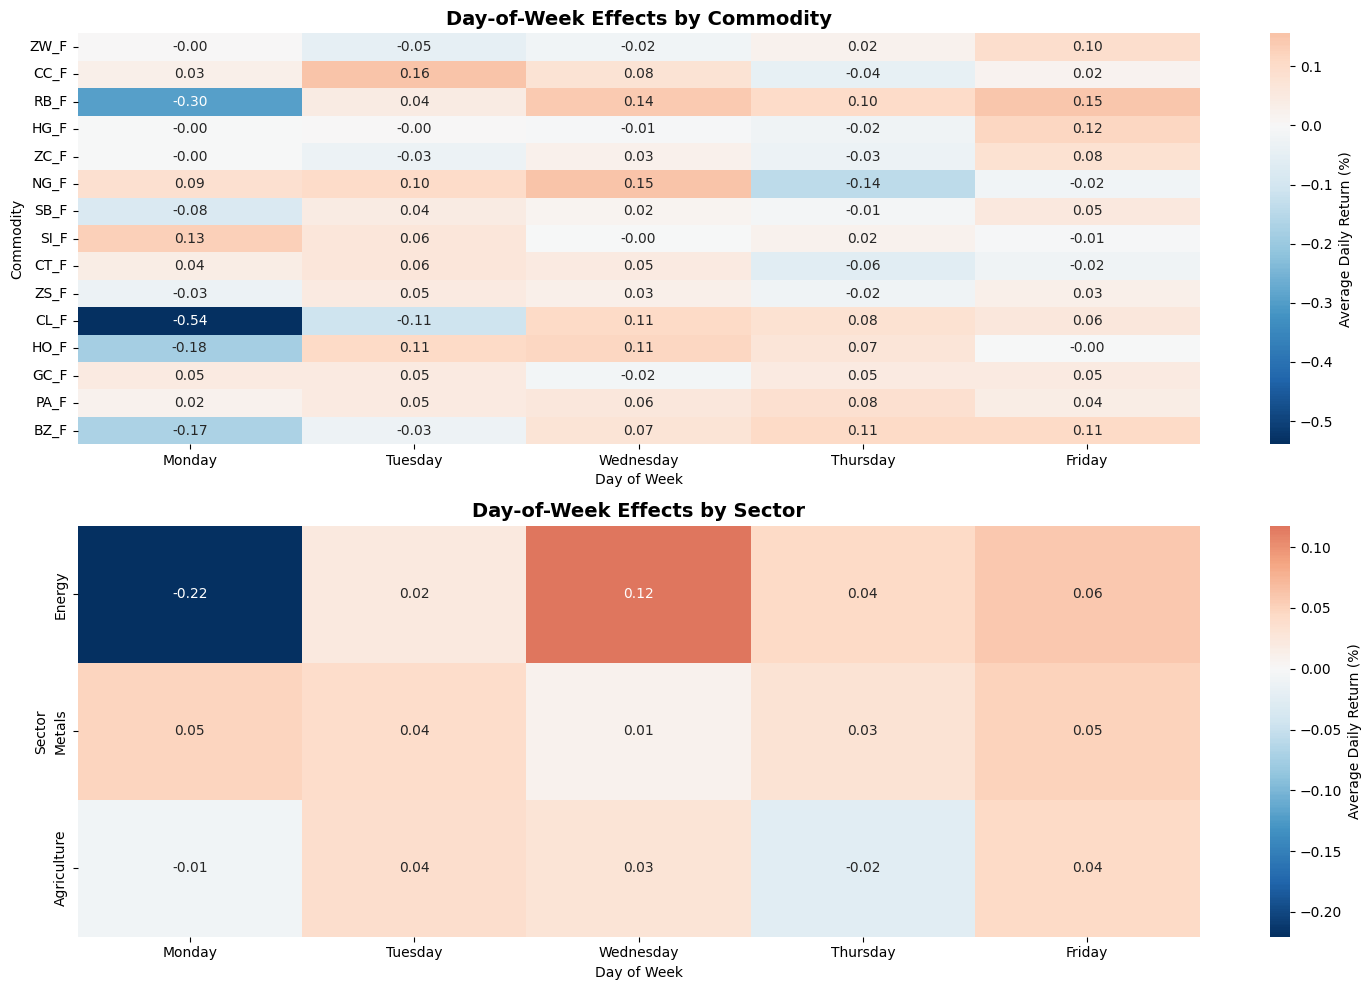

In [21]:
# Calculate and visualize day-of-week effects
dow_effects = seasonal_results['day_of_week_effects']

print("Day-of-Week Effects (Average Daily Returns):")
display((dow_effects * 100).round(3))

# Create visualization
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10))

# Plot 1: Heatmap of day-of-week effects
sns.heatmap(dow_effects.T * 100, 
            annot=True, 
            fmt='.2f', 
            cmap='RdBu_r', 
            center=0,
            ax=ax1,
            cbar_kws={'label': 'Average Daily Return (%)'})
ax1.set_title('Day-of-Week Effects by Commodity', fontsize=14, fontweight='bold')
ax1.set_xlabel('Day of Week')
ax1.set_ylabel('Commodity')

# Plot 2: Average effect by sector
sector_dow = pd.DataFrame()
for sector in ['Energy', 'Metals', 'Agriculture']:
    sector_commodities = [k for k, v in analyzer.sector_mapping.items() if v == sector and k in dow_effects.columns]
    if sector_commodities:
        sector_dow[sector] = dow_effects[sector_commodities].mean(axis=1)

sector_dow_plot = sector_dow.T * 100
sns.heatmap(sector_dow_plot,
            annot=True,
            fmt='.2f',
            cmap='RdBu_r',
            center=0,
            ax=ax2,
            cbar_kws={'label': 'Average Daily Return (%)'})
ax2.set_title('Day-of-Week Effects by Sector', fontsize=14, fontweight='bold')
ax2.set_xlabel('Day of Week')
ax2.set_ylabel('Sector')

plt.tight_layout()
plt.savefig('../results/day_of_week_effects.png', dpi=300, bbox_inches='tight')
plt.show()

## 6. Seasonal Volatility Analysis

Seasonal Volatility Patterns (Monthly Standard Deviation):


,ZW_F,CC_F,RB_F,HG_F,ZC_F,NG_F,SB_F,SI_F,CT_F,ZS_F,CL_F,HO_F,GC_F,PA_F,BZ_F
Jan,1.579,1.894,1.894,1.369,1.400,5.398,1.853,1.786,1.330,1.248,2.171,1.899,0.902,2.103,1.924
Feb,1.943,2.139,2.316,1.374,1.259,3.947,2.024,1.781,1.549,1.097,2.260,2.258,0.970,2.183,2.144
Mar,2.559,2.093,4.275,1.464,1.644,2.885,2.206,1.945,1.727,1.165,3.524,3.019,1.118,3.150,3.014
Apr,1.805,2.274,2.951,1.585,1.547,3.502,1.961,1.950,1.732,1.051,18.729,2.632,1.187,2.172,3.025
May,2.146,2.610,2.232,1.480,1.824,3.161,1.908,1.890,1.885,1.345,2.517,2.225,0.983,2.233,2.230
Jun,2.211,2.192,2.046,1.443,2.053,3.370,1.905,1.795,2.324,1.443,2.152,1.997,1.050,2.020,2.077
Jul,2.353,2.111,1.937,2.014,2.863,2.922,1.957,1.747,2.090,1.758,2.006,1.811,0.870,1.943,1.851
Aug,1.987,1.832,2.509,1.282,1.600,2.694,1.677,1.983,1.542,1.798,2.191,1.918,0.967,2.120,2.045
Sep,1.990,2.163,2.898,1.566,1.753,3.426,2.058,2.303,1.748,1.414,2.295,1.909,1.055,2.185,2.106
Oct,1.715,1.706,2.195,1.487,1.457,3.803,2.009,1.808,1.664,1.192,2.042,1.907,0.946,2.070,1.913


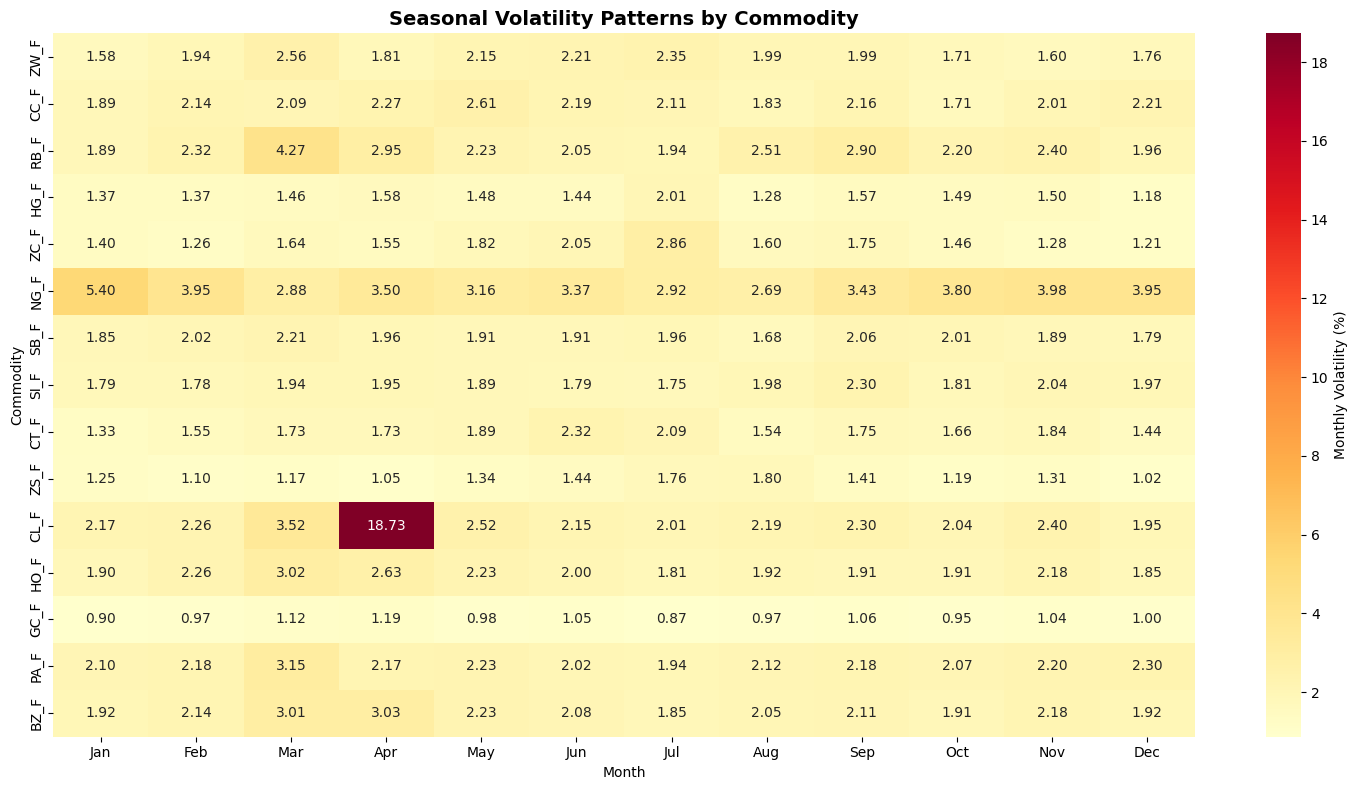

In [22]:
# Analyze seasonal volatility patterns
seasonal_vol = seasonal_results['seasonal_volatility']

print("Seasonal Volatility Patterns (Monthly Standard Deviation):")
display((seasonal_vol * 100).round(3))

# Create volatility heatmap
fig, ax = plt.subplots(figsize=(15, 8))

sns.heatmap(seasonal_vol.T * 100, 
            annot=True, 
            fmt='.2f', 
            cmap='YlOrRd',
            ax=ax,
            cbar_kws={'label': 'Monthly Volatility (%)'})
ax.set_title('Seasonal Volatility Patterns by Commodity', fontsize=14, fontweight='bold')
ax.set_xlabel('Month')
ax.set_ylabel('Commodity')

plt.tight_layout()
plt.savefig('../results/seasonal_volatility.png', dpi=300, bbox_inches='tight')
plt.show()

## 7. Sector Comparison and Rotation Analysis

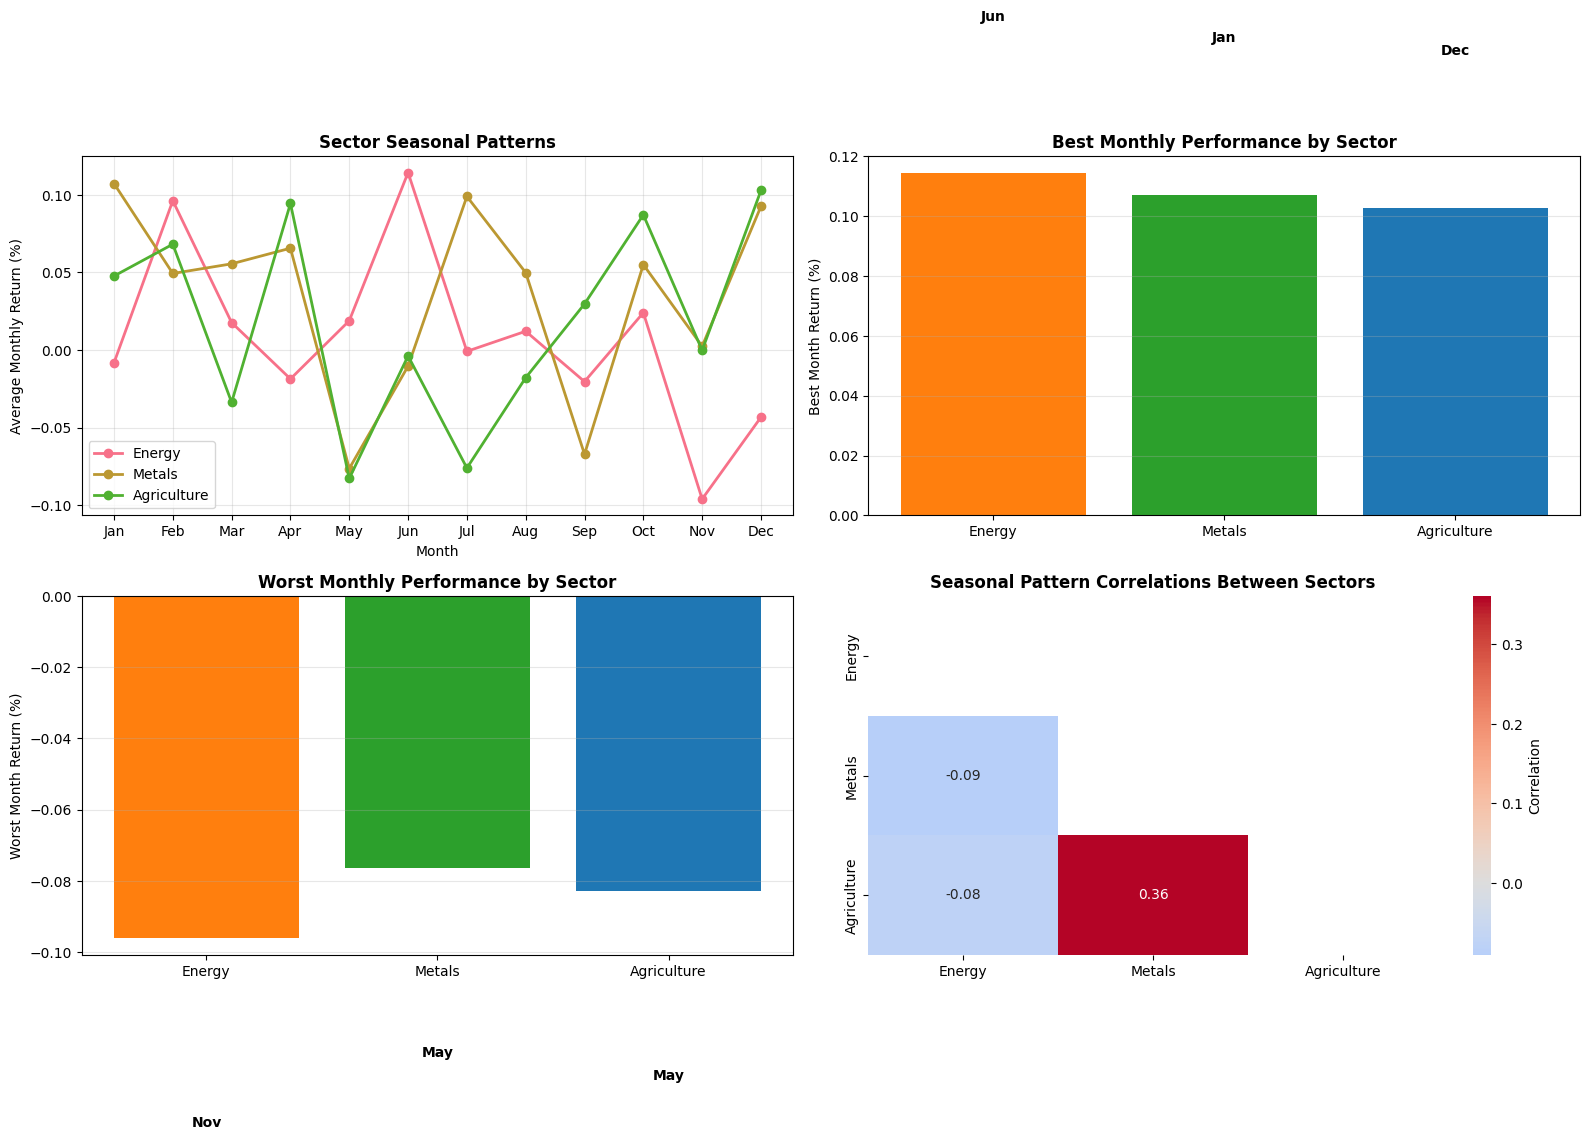

In [23]:
# Create comprehensive sector comparison
sector_seasonality = seasonal_results['sector_seasonality']

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Sector monthly patterns (line plot)
for sector in sector_seasonality.columns:
    ax1.plot(range(1, 13), sector_seasonality[sector] * 100, 
             marker='o', linewidth=2, markersize=6, label=sector)
ax1.set_xlabel('Month')
ax1.set_ylabel('Average Monthly Return (%)')
ax1.set_title('Sector Seasonal Patterns', fontweight='bold')
ax1.grid(True, alpha=0.3)
ax1.legend()
ax1.set_xticks(range(1, 13))
ax1.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                     'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Plot 2: Best months by sector (bar plot)
sector_best = sector_seasonality.idxmax()
sector_best_values = sector_seasonality.max() * 100

bars = ax2.bar(sector_best_values.index, sector_best_values, 
               color=['#ff7f0e', '#2ca02c', '#1f77b4'])
ax2.set_ylabel('Best Month Return (%)')
ax2.set_title('Best Monthly Performance by Sector', fontweight='bold')
ax2.grid(axis='y', alpha=0.3)

# Add best month labels
for bar, month in zip(bars, sector_best):
    ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.05, 
             month, ha='center', va='bottom', fontweight='bold')

# Plot 3: Worst months by sector
sector_worst = sector_seasonality.idxmin()
sector_worst_values = sector_seasonality.min() * 100

bars = ax3.bar(sector_worst_values.index, sector_worst_values, 
               color=['#ff7f0e', '#2ca02c', '#1f77b4'])
ax3.set_ylabel('Worst Month Return (%)')
ax3.set_title('Worst Monthly Performance by Sector', fontweight='bold')
ax3.grid(axis='y', alpha=0.3)

# Add worst month labels
for bar, month in zip(bars, sector_worst):
    ax3.text(bar.get_x() + bar.get_width()/2, bar.get_height() - 0.05, 
             month, ha='center', va='top', fontweight='bold')

# Plot 4: Seasonal correlation matrix
sector_corr = sector_seasonality.corr()
mask = np.triu(np.ones_like(sector_corr, dtype=bool))
sns.heatmap(sector_corr, mask=mask, annot=True, fmt='.2f', 
            cmap='coolwarm', center=0, ax=ax4,
            cbar_kws={'label': 'Correlation'})
ax4.set_title('Seasonal Pattern Correlations Between Sectors', fontweight='bold')

plt.tight_layout()
plt.savefig('../results/sector_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

## 8. Key Findings Summary

In [25]:
# Generate comprehensive summary
print("=" * 80)
print("COMMODITIES SEASONALITY ANALYSIS - KEY FINDINGS SUMMARY")
print("=" * 80)

print(f"\\n📊 DATA OVERVIEW:")
print(f"   • Analysis period: {seasonal_results['data_period'][0].strftime('%B %Y')} to {seasonal_results['data_period'][1].strftime('%B %Y')}")
print(f"   • Total observations: {seasonal_results['total_observations']:,} trading days")
print(f"   • Commodities analyzed: {len(seasonal_results['commodities_analyzed'])}")
print(f"   • Sectors covered: Energy, Metals, Agriculture")

print(f"\\n🏆 STRONGEST SEASONAL EFFECTS:")
top_seasonal = seasonal_strength.nlargest(5)
for i, (commodity, strength) in enumerate(top_seasonal.items(), 1):
    sector = analyzer.sector_mapping.get(commodity, 'Unknown')
    best_month = best_months[commodity]
    worst_month = worst_months[commodity]
    print(f"   {i}. {commodity} ({sector}): {strength*100:.1f}% spread (Best: {best_month}, Worst: {worst_month})")

print(f"\\n📈 SECTOR SEASONAL HIGHLIGHTS:")
for sector in ['Energy', 'Metals', 'Agriculture']:
    sector_best_month = sector_seasonality[sector].idxmax()
    sector_best_return = sector_seasonality[sector].max() * 100
    sector_worst_month = sector_seasonality[sector].idxmin()
    sector_worst_return = sector_seasonality[sector].min() * 100
    print(f"   • {sector}: Best in {sector_best_month} ({sector_best_return:+.2f}%), Worst in {sector_worst_month} ({sector_worst_return:+.2f}%)")

print(f"\\n📅 CALENDAR ANOMALIES:")
# Find most common best and worst months
best_month_counts = best_months.value_counts()
worst_month_counts = worst_months.value_counts()
print(f"   • Most common best month: {best_month_counts.index[0]} ({best_month_counts.iloc[0]} commodities)")
print(f"   • Most common worst month: {worst_month_counts.index[0]} ({worst_month_counts.iloc[0]} commodities)")

# Day of week effects
avg_dow = dow_effects.mean(axis=1) * 100
best_dow = avg_dow.idxmax()
worst_dow = avg_dow.idxmin()
print(f"   • Best day of week: {best_dow} ({avg_dow[best_dow]:+.3f}% avg return)")
print(f"   • Worst day of week: {worst_dow} ({avg_dow[worst_dow]:+.3f}% avg return)")

print(f"\\n🔬 STATISTICAL SIGNIFICANCE:")
significant_patterns = (p_values < 0.05).sum().sum()
total_patterns = p_values.shape[0] * p_values.shape[1]
print(f"   • Statistically significant patterns: {significant_patterns}/{total_patterns} ({significant_patterns/total_patterns*100:.1f}%)")
print(f"   • Most statistically significant commodity: {(p_values < 0.05).sum().idxmax()}")

print(f"\\n💡 TRADING IMPLICATIONS:")
print(f"   • Strong seasonal patterns exist across multiple commodities")

# Fix the error by using absolute values to find strongest sector
sector_abs_mean = sector_seasonality.abs().mean()
strongest_sector = sector_abs_mean.idxmax()
print(f"   • {strongest_sector} sector shows strongest average seasonality")

print(f"   • Calendar-based strategies may be particularly effective in high-seasonal-strength commodities")
print(f"   • Consider sector rotation strategies based on seasonal timing")

print("\\n" + "=" * 80)

COMMODITIES SEASONALITY ANALYSIS - KEY FINDINGS SUMMARY
\n📊 DATA OVERVIEW:
   • Analysis period: January 2010 to August 2025
   • Total observations: 3,867 trading days
   • Commodities analyzed: 15
   • Sectors covered: Energy, Metals, Agriculture
\n🏆 STRONGEST SEASONAL EFFECTS:
   1. CL_F (Energy): 1.1% spread (Best: Jun, Worst: Apr)
   2. NG_F (Energy): 0.8% spread (Best: Apr, Worst: Dec)
   3. RB_F (Energy): 0.6% spread (Best: Mar, Worst: Sep)
   4. SB_F (Agriculture): 0.6% spread (Best: Oct, Worst: Mar)
   5. ZC_F (Agriculture): 0.5% spread (Best: Dec, Worst: Jul)
\n📈 SECTOR SEASONAL HIGHLIGHTS:
   • Energy: Best in Jun (+0.11%), Worst in Nov (-0.10%)
   • Metals: Best in Jan (+0.11%), Worst in May (-0.08%)
   • Agriculture: Best in Dec (+0.10%), Worst in May (-0.08%)
\n📅 CALENDAR ANOMALIES:
   • Most common best month: Dec (4 commodities)
   • Most common worst month: Sep (4 commodities)
   • Best day of week: Wednesday (+0.054% avg return)
   • Worst day of week: Monday (-0.064%

## 9. Export Results

In [ ]:
# Save all results to CSV files
analyzer.save_results(seasonal_results)

print("Analysis complete! Results saved to:")
print("• ../results/monthly_returns.csv")
print("• ../results/statistical_significance.csv")
print("• ../results/day_of_week_effects.csv")
print("• ../results/seasonal_volatility.csv")
print("• ../results/sector_seasonality.csv")
print("• ../results/best_months.csv")
print("• ../results/worst_months.csv")
print("• ../results/seasonal_strength.csv")
print("\nVisualization files:")
print("• ../results/monthly_seasonality_heatmaps.png")
print("• ../results/seasonal_significance.png")
print("• ../results/seasonal_strength_analysis.png")
print("• ../results/day_of_week_effects.png")
print("• ../results/seasonal_volatility.png")
print("• ../results/sector_analysis.png")